## Ex 10 Weekly dataset

**10.a) numerical and graphical summary of the Weekly data**

In [2]:
require(ISLR)
#SP500 weekly returns between 1990 and 2010
str(Weekly)
dim(Weekly)
summary(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


[1] 1089    9

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

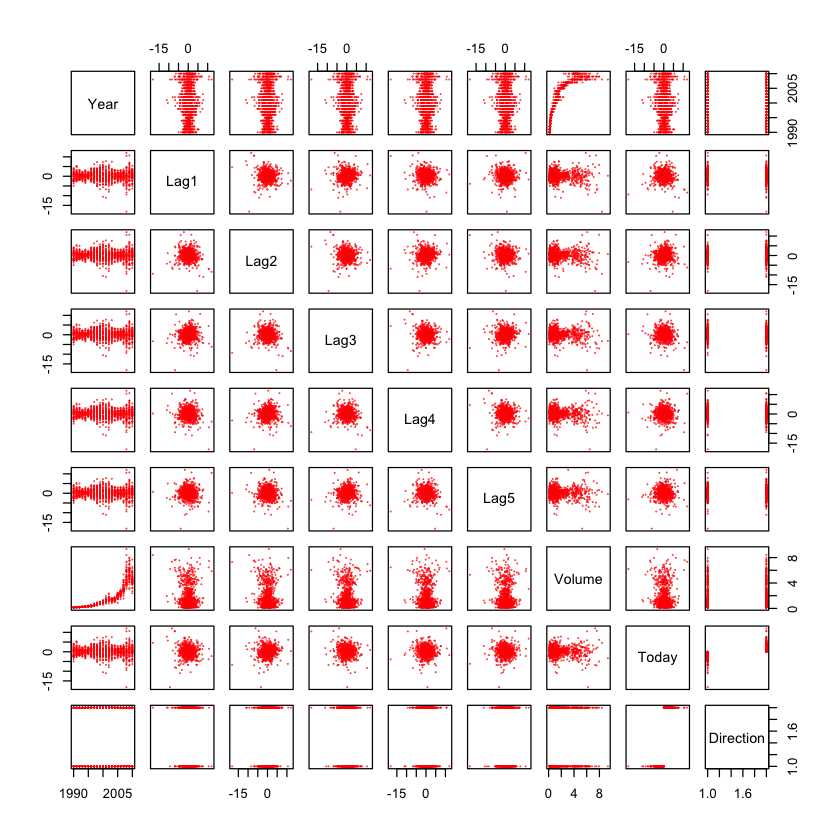

In [5]:
pairs(Weekly, cex=0.1, col="red")
# we do not observe sppcifice relations other thena between volum and year
# similar ot the Smarket dataset

In [6]:
## correlations appear to be low except Year~Volume
print(cor(Weekly[,-9]))

              Year         Lag1        Lag2        Lag3         Lag4
Year    1.00000000 -0.032289274 -0.03339001 -0.03000649 -0.031127923
Lag1   -0.03228927  1.000000000 -0.07485305  0.05863568 -0.071273876
Lag2   -0.03339001 -0.074853051  1.00000000 -0.07572091  0.058381535
Lag3   -0.03000649  0.058635682 -0.07572091  1.00000000 -0.075395865
Lag4   -0.03112792 -0.071273876  0.05838153 -0.07539587  1.000000000
Lag5   -0.03051910 -0.008183096 -0.07249948  0.06065717 -0.075675027
Volume  0.84194162 -0.064951313 -0.08551314 -0.06928771 -0.061074617
Today  -0.03245989 -0.075031842  0.05916672 -0.07124364 -0.007825873
               Lag5      Volume        Today
Year   -0.030519101  0.84194162 -0.032459894
Lag1   -0.008183096 -0.06495131 -0.075031842
Lag2   -0.072499482 -0.08551314  0.059166717
Lag3    0.060657175 -0.06928771 -0.071243639
Lag4   -0.075675027 -0.06107462 -0.007825873
Lag5    1.000000000 -0.05851741  0.011012698
Volume -0.058517414  1.00000000 -0.033077783
Today   0.011012698

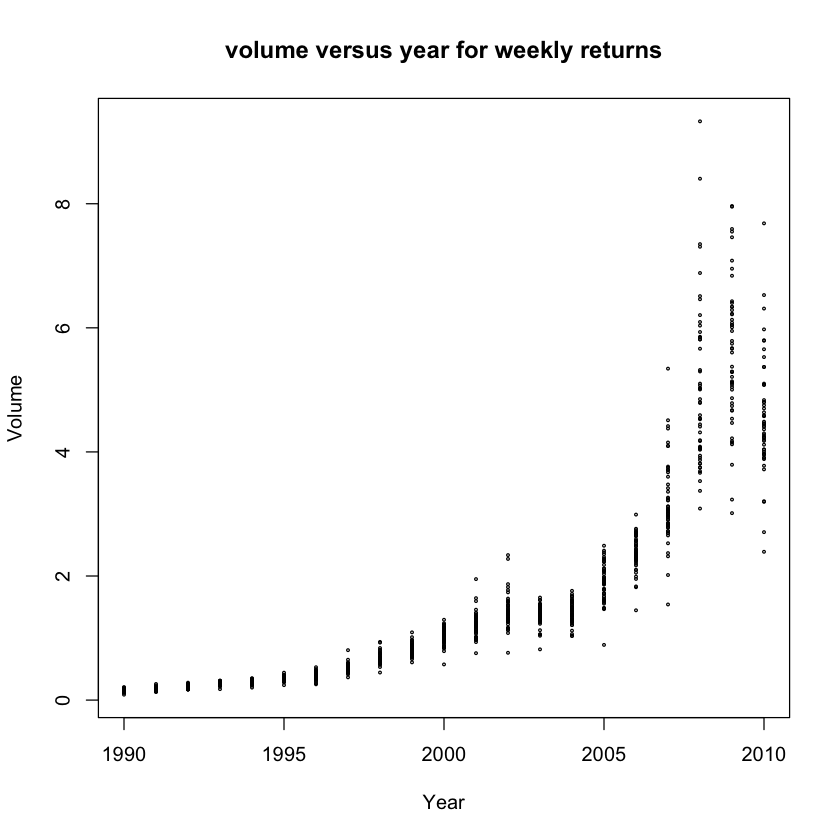

In [14]:
plot(Volume~Year, data=Weekly,cex=0.3,main="volume versus year for weekly returns")
# we observe  volume increase up to 2008 then some decrease in 2009,2010

**10.b) Logistic regression**

In [15]:
##logistic regression
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Weekly, family=binomial)
print(summary(glm.fit))
# as we see we have a significant p-value for Lag2


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4



**10.c) compute the confusion matrix  and overral error rate for logistic regression**

In [16]:
logr.proba <- predict(glm.fit, type="response")
logr.pred <- rep("Down", length(logr.proba))
logr.pred[logr.proba > .5] <- "Up"

logr.cfm <- table(logr.pred, Weekly$Direction)
print(logr.cfm)

print(paste("log reg model correct rate:",mean(logr.pred == Weekly$Direction)))
print(paste("log reg model error rate:", 1 - mean(logr.pred == Weekly$Direction)))

## weeks that market is predicted to go  up is  557/(557+48) = 92.1%
## weeks that market is predicted to go down is 54 / (430 + 54) = 11.2 %

         
logr.pred Down  Up
     Down   54  48
     Up    430 557
[1] "log reg model correct rate: 0.561065197428834"
[1] "log reg model error rate: 0.438934802571166"


** optional,  check the predictive power of this model on test set, trained on training set 1990-2008**

In [17]:
#split to training and test  sets
train_idx <- Weekly$Year < 2009
Weekly_train <- Weekly[train_idx,]
Weekly_test  <- Weekly[!train_idx,]
print(dim(Weekly_train))
print(dim(Weekly_test))

[1] 985   9
[1] 104   9


In [18]:
##use the same model applied on training data set
glm.fit_tr <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume
	          ,data=Weekly_train, family=binomial)

In [20]:
#compute predictions on test dataset and print the confusion matrix
logr.proba_ts <- predict(glm.fit_tr, Weekly_test, type="response")
logr.pred_ts <- rep("Down", length(logr.proba_ts))
logr.pred_ts[logr.proba_ts > .5] <- "Up"
print(length(logr.pred_ts))

logr.cfm_ts <- table(logr.pred_ts, Weekly_test$Direction)
print(logr.cfm_ts)
print(paste("log reg same model correct rate on test:",mean(logr.pred_ts == Weekly_test$Direction)))
print(paste("log reg same model error rate on test:", 1 - mean(logr.pred_ts == Weekly_test$Direction)))

## as we can observe our eror rate on test data increases from 0.43  to 0.53!!!

[1] 104
            
logr.pred_ts Down Up
        Down   31 44
        Up     12 17
[1] "log reg same model correct rate on test: 0.461538461538462"
[1] "log reg same model error rate on test: 0.538461538461538"


** 10.d)  fit a logistic regression using only Lag2  using a training set and make predicions on test set**

In [22]:
glm.fit_tr2 <- glm(Direction~Lag2,data=Weekly_train, family=binomial)
print(summary(glm.fit_tr2))


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly_train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4



In [23]:
#compute predictions on test dataset and print the confusion matrix
logr.proba_ts <- predict(glm.fit_tr2, Weekly_test, type="response")
logr.pred_ts <- rep("Down", length(logr.proba_ts))
logr.pred_ts[logr.proba_ts > .5] <- "Up"


logr.cfm_ts <- table(logr.pred_ts, Weekly_test$Direction)
print(logr.cfm_ts)
print(paste("log reg Lag2 model correct rate on test:",mean(logr.pred_ts == Weekly_test$Direction)))
print(paste("log reg Lag2 model error rate on test:", 1 - mean(logr.pred_ts == Weekly_test$Direction)))

## as we see Logistic regression using just Lag2 is much better compared to using all Lags 

            
logr.pred_ts Down Up
        Down    9  5
        Up     34 56
[1] "log reg Lag2 model correct rate on test: 0.625"
[1] "log reg Lag2 model error rate on test: 0.375"


**10.e) repead d) using LDA **

In [25]:
##10.e)  repeat d) using LDA
require(MASS)
lda.fit <- lda(Direction~Lag2, data=Weekly, subset=train_idx)
lda.pred <- predict(lda.fit, Weekly_test)
lda.class <- lda.pred$class 

lda.cfm <- table(lda.class, Weekly_test$Direction)
print(lda.cfm)
print(paste("LDA Lag2 model correct rate on test:",mean(lda.class == Weekly_test$Direction)))
print(paste("LDA Lag2 model error rate on test:", 1 - mean(lda.class == Weekly_test$Direction)))


         
lda.class Down Up
     Down    9  5
     Up     34 56
[1] "LDA Lag2 model correct rate on test: 0.625"
[1] "LDA Lag2 model error rate on test: 0.375"


**10.f) repead d) using QDA **

In [26]:
##10.f  repead d) using QDA
qda.fit <- qda(Direction~Lag2, data=Weekly, subset=train_idx)
qda.pred <- predict(qda.fit, Weekly_test)
qda.class <-qda.pred$class 
qda.cfm <- table(qda.class, Weekly_test$Direction)
print(qda.cfm)
print(paste("QDA Lag2 model correct rate on test:",mean(qda.class == Weekly_test$Direction)))
print(paste("QDA Lag2 model error rate on test:", 1 - mean(qda.class == Weekly_test$Direction)))

         
qda.class Down Up
     Down    0  0
     Up     43 61
[1] "QDA Lag2 model correct rate on test: 0.586538461538462"
[1] "QDA Lag2 model error rate on test: 0.413461538461538"


**10.f) repead d) using knnn with k=1 **

In [27]:
##10.g  repeat d) knn with k=1
library(class)

train.X <- cbind(Weekly_train$Lag2)
test.X <- cbind(Weekly_test$Lag2)

#define a knn function to be ran later with different k
getKnnPrediction <- function(train, test, train_y, test_y, k=1){ 
	set.seed (1)
	knn.pred <- knn(train,test,train_y, k=k)
	cfm_knn <- table(knn.pred, test_y)
	print(cfm_knn) 
    print(paste("knn model correct rate on test for k =",k,":",
    	mean(knn.pred == test_y)))
    print(paste("knn model error rate on test for k =",k,":",
    	1-mean(knn.pred == test_y)))

}

getKnnPrediction(train=train.X, test=test.X,
	             train_y=Weekly_train$Direction, test_y=Weekly_test$Direction,k=1)

        test_y
knn.pred Down Up
    Down   21 30
    Up     22 31
[1] "knn model correct rate on test for k = 1 : 0.5"
[1] "knn model error rate on test for k = 1 : 0.5"


**10.h) which of the methods above gives better results? **

The best error rate is for Lag2 as a sole predictor model is given by LDA and Logistic Regression

**10.i) experiment with different combination of predictors **

In [29]:
## experimenting with Lag2 model knn using different k 
getKnnPrediction(train=train.X, test=test.X,
                 train_y=Weekly_train$Direction, test_y=Weekly_test$Direction,k=1)
getKnnPrediction(train=train.X, test=test.X,
                 train_y=Weekly_train$Direction, test_y=Weekly_test$Direction,k=2)

getKnnPrediction(train=train.X, test=test.X,
                 train_y=Weekly_train$Direction, test_y=Weekly_test$Direction,k=3)

getKnnPrediction(train=train.X, test=test.X,
                 train_y=Weekly_train$Direction, test_y=Weekly_test$Direction,k=4)

getKnnPrediction(train=train.X, test=test.X,
                 train_y=Weekly_train$Direction, test_y=Weekly_test$Direction,k=5)

#we see that the best error rate is given by k=4

        test_y
knn.pred Down Up
    Down   21 30
    Up     22 31
[1] "knn model correct rate on test for k = 1 : 0.5"
[1] "knn model error rate on test for k = 1 : 0.5"
        test_y
knn.pred Down Up
    Down   19 27
    Up     24 34
[1] "knn model correct rate on test for k = 2 : 0.509615384615385"
[1] "knn model error rate on test for k = 2 : 0.490384615384615"
        test_y
knn.pred Down Up
    Down   16 20
    Up     27 41
[1] "knn model correct rate on test for k = 3 : 0.548076923076923"
[1] "knn model error rate on test for k = 3 : 0.451923076923077"
        test_y
knn.pred Down Up
    Down   20 17
    Up     23 44
[1] "knn model correct rate on test for k = 4 : 0.615384615384615"
[1] "knn model error rate on test for k = 4 : 0.384615384615385"
        test_y
knn.pred Down Up
    Down   16 21
    Up     27 40
[1] "knn model correct rate on test for k = 5 : 0.538461538461538"
[1] "knn model error rate on test for k = 5 : 0.461538461538462"


In [30]:
## use 1/2(Lag1+Lag2) as predictor
##combine lag1 and lag2 into averaged lag 
Weekly_t <- Weekly 
Weekly_t$Lag12 <- 0.5*(Weekly_t$Lag1+Weekly_t$Lag2)
Weekly_t_train <- Weekly_t[train_idx,]
Weekly_t_test  <- Weekly_t[!train_idx,]

lda.fit <- lda(Direction~Lag12, data=Weekly_t, subset=train_idx)
lda.pred <- predict(lda.fit, Weekly_t_test)
lda.class <- lda.pred$class 

lda.cfm <- table(lda.class, Weekly_t_test$Direction)
print(lda.cfm)
print(paste("LDA Lag12 model correct rate on test:",mean(lda.class == Weekly_t_test$Direction)))
print(paste("LDA Lag12 model error rate on test:", 1 - mean(lda.class == Weekly_t_test$Direction)))

#we observe that this approach makes a worse result than LDA using just L2
# knn with k=4 gives similar results as LDA on L2

         
lda.class Down Up
     Down    0  0
     Up     43 61
[1] "LDA Lag12 model correct rate on test: 0.586538461538462"
[1] "LDA Lag12 model error rate on test: 0.413461538461538"


In [31]:
#check Log Reg with Lag1:lAg2   i.e. with inrecaction term

glm.fit_tr2 <- glm(Direction~Lag2:Lag1,data=Weekly_train, family=binomial)

logr.proba_ts <- predict(glm.fit_tr2, Weekly_test, type="response")
logr.pred_ts <- rep("Down", length(logr.proba_ts))
logr.pred_ts[logr.proba_ts > .5] <- "Up"


logr.cfm_ts <- table(logr.pred_ts, Weekly_test$Direction)
print(logr.cfm_ts)
print(paste("log reg Lag2:Lag1 model correct rate on test:",mean(logr.pred_ts == Weekly_test$Direction)))
print(paste("log reg Lag2:Lag1 model error rate on test:", 1 - mean(logr.pred_ts == Weekly_test$Direction)))



            
logr.pred_ts Down Up
        Down    1  1
        Up     42 60
[1] "log reg Lag2:Lag1 model correct rate on test: 0.586538461538462"
[1] "log reg Lag2:Lag1 model error rate on test: 0.413461538461538"


**we observe that the original model on Lag2  LogReg and LDA  plus knn with k=4 yielded the best results**